# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Radmehr Karimian
2.   Student Number: 98103556


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/DeepLearning

/content/gdrive/MyDrive/DeepLearning


In [ ]:
!ls

data


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

train_dataset = dataset.sample(frac=0.8, replace=False, random_state=1)
test_dataset=dataset.drop(train_dataset.index)
train = train_dataset.shape[0]
test = test_dataset.shape[0]


x_train = np.array(train_dataset.X).reshape(train,1)
y_train = np.array(train_dataset.Y).reshape(train,1)

x_test = np.array(test_dataset.X).reshape(test,1)
y_test = np.array(test_dataset.Y).reshape(test,1)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = x_train
A = np.hstack((A,np.ones((train,1),dtype=np.float64)))
Y = np.array(y_train).reshape(train,1)

m = np.linalg.inv(A.T @  A)@((A).T @ Y)

In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.sum((y_train-predicted_train_y)**2)/len(y_train)
test_error = np.sum((y_test-predicted_test_y)**2)/len(y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3140290524996677
MSE test error: 0.39731482572060345


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

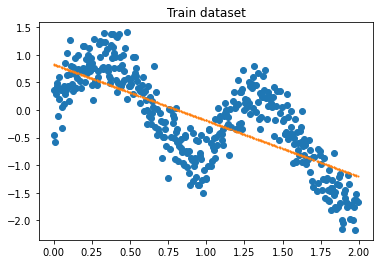

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

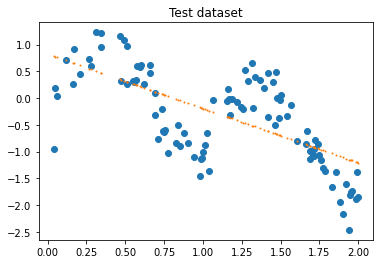

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

they were not good, this model predicted this dataset well as linear regression but our data isn't linear i think that third-digree is much better answer

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

yes it would be better because as you can see you can break our data in forms that as liner in several parts, so this is why Locally Weighted Linear Regression would be better option than Linear Regression.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
      q = np.array([np.sum(the_query_point[0,0]),1])
      W[i, i] = np.exp(-(np.transpose(xi-q) @ (xi-q))/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_dataset.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.inv(np.transpose(X) @ W @ X)@(np.transpose(X) @ W @ train_Y)

    return np.sum(np.dot(qx, theta))[0]

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
hyperparameter=0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = np.sum((y_test-predicted_test)**2)
error = error/len(y_test)
print(f"MSE test error: {error}")

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: 0.11280268817178454


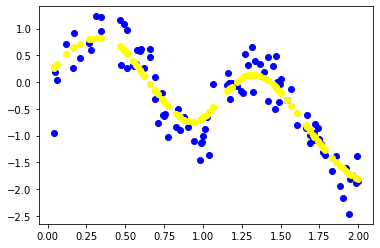

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

according to better fit and less MSE it's better

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

I think because it's non linear it will works better

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.abs(x2-x1) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indices = []
        dis = []
        for point in self.X:
          dis.append(self.distance(point,x))
        for i in range(self.k):
          door = np.inf
          indexx = 0
          for j,d in enumerate(dis):
            if door>d :
              indexx = j
              door = d
              dis[j]=np.inf
          indices.append([self.Y[indexx,0]])
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.sum(neareest_indices)/np.size(neareest_indices)
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = np.array([model.predict(x) for x in x_test]).reshape(test,1)
    error = np.sum((y_test-predicted_y)**2)/len(y_test)
    return error, predicted_y

In [ ]:
k = 3
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.11235554485342879


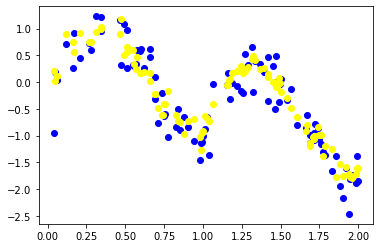

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?
it performs better that last solution but not perfect

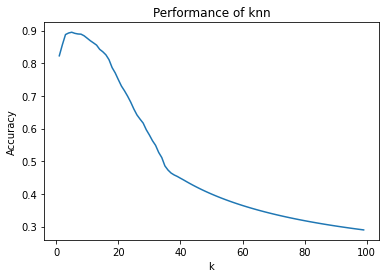

In [ ]:
accuracies = []
ks = range(1, 100)
max_error = 1
for k in ks:
    error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
    accuracy = 1 - error_knn
    if (error_knn<max_error):
      k_min = k
      best_acc = 1 - error_knn
      max_error = error_knn
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [ ]:
print(f"the best accuracy is for k = {k_min} with {best_acc}")

the best accuracy is for k = 5 with 0.894718175588322


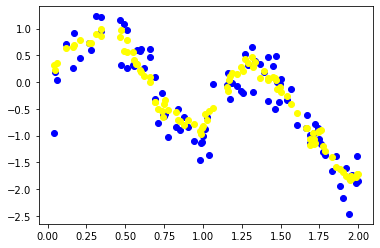

In [ ]:
k = 5
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

As you saw we found best K 